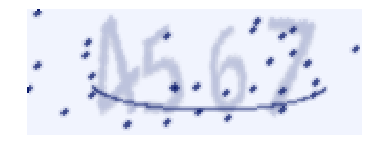

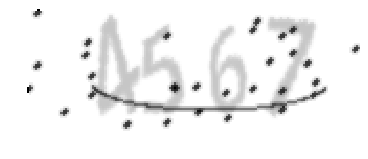

In [2]:
import tensorflow as tf
from cnn_train import cnn_graph
from captcha_gen import gen_captcha_text_and_image
from util import vec2text, convert2gray
from util import CAPTCHA_LIST, CAPTCHA_WIDTH, CAPTCHA_HEIGHT, CAPTCHA_LEN
import matplotlib.pyplot as plt


def captcha2text(image_list, height=CAPTCHA_HEIGHT, width=CAPTCHA_WIDTH):
    '''
    验证码图片转化为文本
    :param image_list:
    :param height:
    :param width:
    :return:
    '''
    x = tf.placeholder(tf.float32, [None, height * width])
    keep_prob = tf.placeholder(tf.float32)
    y_conv = cnn_graph(x, keep_prob, (height, width))
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, saver.restore(sess, tf.train.latest_checkpoint('.')))
        predict = tf.argmax(tf.reshape(y_conv, [-1, CAPTCHA_LEN, len(CAPTCHA_LIST)]), 2)
        vector_list = sess.run(predict, feed_dict={x: image_list, keep_prob: 1})
        vector_list = vector_list.tolist()
        text_list = [vec2text(vector) for vector in vector_list]
        return text_list

if __name__ == '__main__':
    text, image = gen_captcha_text_and_image()
    plt.figure('color')
    plt.imshow(image, cmap='gray')

    plt.axis('off')
    plt.show()
    image = convert2gray(image)
    #image = image.flatten() / 255
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()


    #pre_text = captcha2text([image])
    #print('Label:', text, ' Predict:', pre_text)

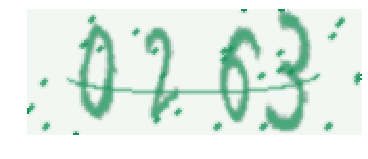

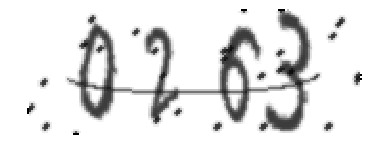

In [11]:
import tensorflow as tf
from cnn_train import cnn_graph
from captcha_gen import gen_captcha_text_and_image
from util import vec2text, convert2gray
from util import CAPTCHA_LIST, CAPTCHA_WIDTH, CAPTCHA_HEIGHT, CAPTCHA_LEN
import matplotlib.pyplot as plt


def captcha2text(image_list, height=CAPTCHA_HEIGHT, width=CAPTCHA_WIDTH):
    '''
    验证码图片转化为文本
    :param image_list:
    :param height:
    :param width:
    :return:
    '''
    x = tf.placeholder(tf.float32, [None, height * width])
    keep_prob = tf.placeholder(tf.float32)
    y_conv = cnn_graph(x, keep_prob, (height, width))
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, saver.restore(sess, tf.train.latest_checkpoint('.')))
        predict = tf.argmax(tf.reshape(y_conv, [-1, CAPTCHA_LEN, len(CAPTCHA_LIST)]), 2)
        vector_list = sess.run(predict, feed_dict={x: image_list, keep_prob: 1})
        vector_list = vector_list.tolist()
        text_list = [vec2text(vector) for vector in vector_list]
        return text_list

if __name__ == '__main__':
    text, image = gen_captcha_text_and_image()
    plt.figure('color')
    plt.imshow(image, cmap='gray')

    plt.axis('off')
    plt.show()
    image = convert2gray(image)
    #image = image.flatten() / 255
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()


    #pre_text = captcha2text([image])
    #print('Label:', text, ' Predict:', pre_text)

In [3]:
print(tf.__version__)

1.12.0


In [4]:
import captcha
print(captcha.__version__)

0.3
